<a href="https://colab.research.google.com/github/riyaku11/Fintech/blob/main/digital_religion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [ ]:
import pandas as pd

import nltk


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [ ]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('./2023_karnataka_data.csv')

In [ ]:
print("Original Dataset:")
print(df.head())


Original Dataset:
             id                                          tweetText  \
0  1.730000e+18  @PrakashJavdekar @BJP4India @PMOIndia @narendr...   
1  1.730000e+18  @Aasif_panacea @RavinderKapur2 Eh magic EVM's ...   
2  1.730000e+18  Abe hutiya ab janta tum jaiso ko pehchan gai k...   
3  1.730000e+18  Kab Tak yahi RANTI RONA karoge \n\nEVM Karnata...   
4  1.730000e+18  Kar di wahi Kam Samjh wali \n\nTelangana,  Kar...   

                                            tweetURL   type       tweetAuthor  \
0  https://twitter.com/MyInfo75815757/status/1732...  tweet   janta.cha.party   
1  https://twitter.com/srivardhangnt/status/17321...  tweet  SRIVARDHAN GANTA   
2  https://twitter.com/arvindshuk19397/status/173...  tweet      arvindshukla   
3  https://twitter.com/Ashish19086263/status/1731...  tweet  Beef Janta Party   
4  https://twitter.com/Ashish19086263/status/1731...  tweet  Beef Janta Party   

   replyCount  quoteCount  retweetCount  likeCount views  bookmarkCount  \

In [ ]:
df = df.dropna()


In [ ]:
columns_to_drop = ['tweetURL', 'allMediaURL','quoteCount','type']
df = df.drop(columns=columns_to_drop)

In [ ]:
df['tweetText'] = df['tweetText'].str.lower()


In [ ]:
df['tweetText'] = df['tweetText'].str.replace('[^a-zA-Z\s]', '')
df['tweetText'] = df['tweetText'].str.replace('http\S+|www.\S+', '', case=False)

<ipython-input-11-d98ca4ab79f5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweetText'] = df['tweetText'].str.replace('[^a-zA-Z\s]', '')
<ipython-input-11-d98ca4ab79f5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweetText'] = df['tweetText'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:

df['tokenized_text'] = df['tweetText'].apply(word_tokenize)

In [ ]:
stemmer = PorterStemmer()
df['stemmed_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])


In [ ]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
stop_words = set(stopwords.words('english'))
df['filtered_text'] = df['tokenized_text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:
print("\nCleaned and Preprocessed Dataset:")
print(df.head())


Cleaned and Preprocessed Dataset:
              id                                          tweetText  \
22  1.700000e+18  supriyashrinate aajtak anjanaomkashyap madam c...   
24  1.700000e+18  abdul mazeed sab\nstate president\njai prakash...   
26  1.690000e+18  abdul mazeed sab\nkarnataka state president\nj...   
27  1.690000e+18  abdul mazeed sab\nkarnataka state president\nj...   
28  1.690000e+18  abdul mazeed sab\nstate president\njai prakash...   

                        tweetAuthor  replyCount  retweetCount  likeCount  \
22                       A N Pandey           0             0          0   
24                 ABDUL MAZEED SAB           0             0          1   
26  JAI PRAKASH JANTA DAL KARNATAKA           0             0          1   
27  JAI PRAKASH JANTA DAL KARNATAKA           0             0          1   
28  JAI PRAKASH JANTA DAL KARNATAKA           0             0          0   

   views  bookmarkCount         createdAt  \
22    56              0  19-09-2023 

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./cleaned_dataset.csv')

In [ ]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                 id  replyCount  retweetCount    likeCount  bookmarkCount
count  1.120000e+02  112.000000    112.000000   112.000000     112.000000
mean   1.659018e+18    3.946429     58.366071   149.919643       1.598214
std    2.378431e+16   16.618040    391.045837   833.912283       9.270179
min    1.600000e+18    0.000000      0.000000     0.000000       0.000000
25%    1.650000e+18    0.000000      0.000000     0.000000       0.000000
50%    1.660000e+18    0.000000      0.000000     1.000000       0.000000
75%    1.662500e+18    1.000000      5.000000    16.250000       0.000000
max    1.720000e+18  154.000000   3978.000000  6825.000000      95.000000


In [ ]:
engagement_metrics = ['replyCount', 'retweetCount', 'likeCount']


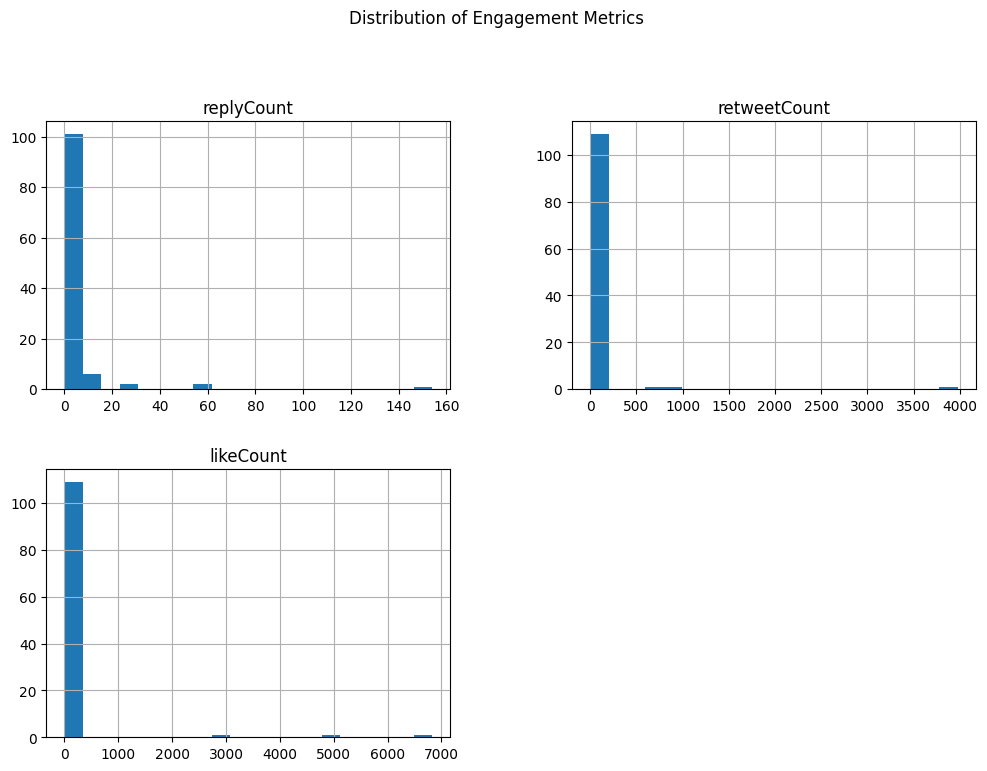

In [ ]:
df[engagement_metrics] = df[engagement_metrics].apply(pd.to_numeric, errors='coerce')

df[engagement_metrics].hist(figsize=(12, 8), bins=20)
plt.suptitle('Distribution of Engagement Metrics', y=1.02)
plt.show()


In [ ]:

df['createdAt'] = pd.to_datetime(df['createdAt'], format='%d-%m-%Y %H:%M', errors='coerce')

print("NaN values in 'createdAt' column:", df['createdAt'].isna().sum())


NaN values in 'createdAt' column: 0


In [ ]:
import pandas as pd

df['createdAt'] = pd.to_datetime(df['createdAt'], format='%d-%m-%Y %H:%M', errors='coerce')

df.set_index('createdAt', inplace=True)

monthly_tweet_counts = df.resample('M').size()

print(monthly_tweet_counts)


createdAt
2023-01-31    10
2023-02-28     1
2023-03-31     3
2023-04-30    18
2023-05-31    51
2023-06-30     2
2023-07-31     6
2023-08-31    13
2023-09-30     4
2023-10-31     2
2023-11-30     1
2023-12-31     1
Freq: M, dtype: int64


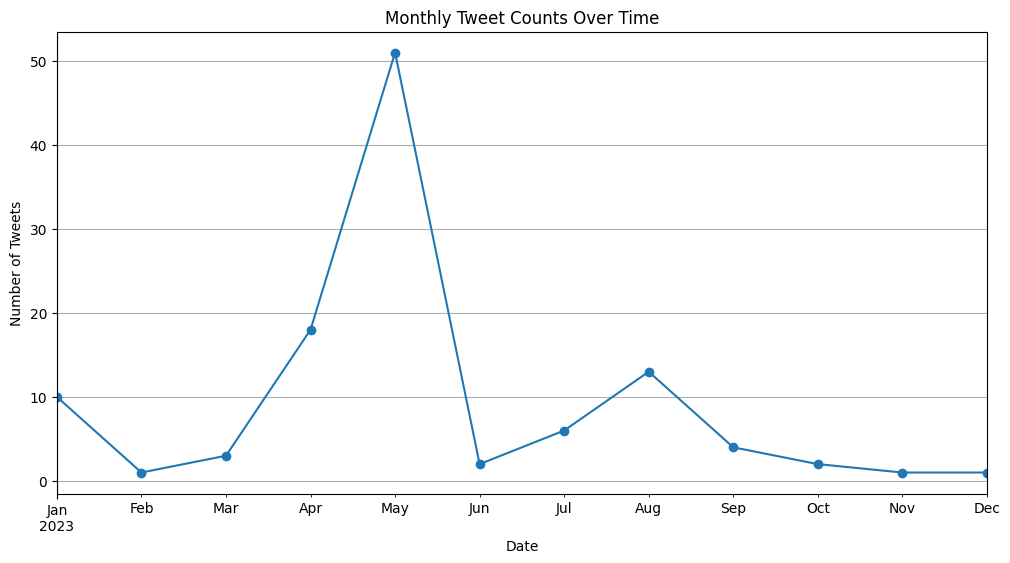

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_tweet_counts.plot(marker='o')
plt.title('Monthly Tweet Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

In [ ]:
max_month = monthly_tweet_counts.idxmax()
min_month = monthly_tweet_counts.idxmin()

print(f"Month with the highest tweet count: {max_month.strftime('%B %Y')}")
print(f"Month with the lowest tweet count: {min_month.strftime('%B %Y')}")

Month with the highest tweet count: May 2023
Month with the lowest tweet count: February 2023


In [ ]:
from textblob import TextBlob

df['sentiment'] = df['tweetText'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


In [ ]:
print(df.head())

                               id  \
createdAt                           
2023-09-19 18:47:00  1.700000e+18   
2023-09-03 21:44:00  1.700000e+18   
2023-08-25 07:31:00  1.690000e+18   
2023-08-24 07:54:00  1.690000e+18   
2023-08-21 20:40:00  1.690000e+18   

                                                             tweetText  \
createdAt                                                                
2023-09-19 18:47:00  supriyashrinate aajtak anjanaomkashyap madam c...   
2023-09-03 21:44:00  abdul mazeed sab\nstate president\njai prakash...   
2023-08-25 07:31:00  abdul mazeed sab\nkarnataka state president\nj...   
2023-08-24 07:54:00  abdul mazeed sab\nkarnataka state president\nj...   
2023-08-21 20:40:00  abdul mazeed sab\nstate president\njai prakash...   

                                         tweetAuthor  replyCount  \
createdAt                                                          
2023-09-19 18:47:00                       A N Pandey           0   
2023-09-03 21:44:

In [ ]:
religion_keywords = ['hindu', 'muslim', 'religion','mandir']
politics_keywords = ['politics', 'government', 'election','bjp', 'congress', 'janta dal', 'janta party']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))
df['politics_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in politics_keywords))


In [ ]:
print(df)

                               id  \
createdAt                           
2023-12-06 21:05:00  1.730000e+18   
2023-12-06 04:57:00  1.730000e+18   
2023-12-05 11:32:00  1.730000e+18   
2023-12-03 18:19:00  1.730000e+18   
2023-12-03 14:41:00  1.730000e+18   
...                           ...   
2023-01-12 23:16:00  1.610000e+18   
2023-01-05 15:02:00  1.610000e+18   
2023-12-08 14:22:00  1.600000e+18   
2023-11-09 00:09:00  1.590000e+18   
2023-10-04 16:28:00  1.580000e+18   

                                                             tweetText  \
createdAt                                                                
2023-12-06 21:05:00  prakashjavdekar bjpindia pmoindia narendramodi...   
2023-12-06 04:57:00  aasifpanacea ravinderkapur eh magic evms telan...   
2023-12-05 11:32:00  abe hutiya ab janta tum jaiso ko pehchan gai k...   
2023-12-03 18:19:00  kab tak yahi ranti rona karoge \n\nevm karnata...   
2023-12-03 14:41:00  kar di wahi kam samjh wali \n\ntelangana  karn...   


<Figure size 1200x800 with 0 Axes>

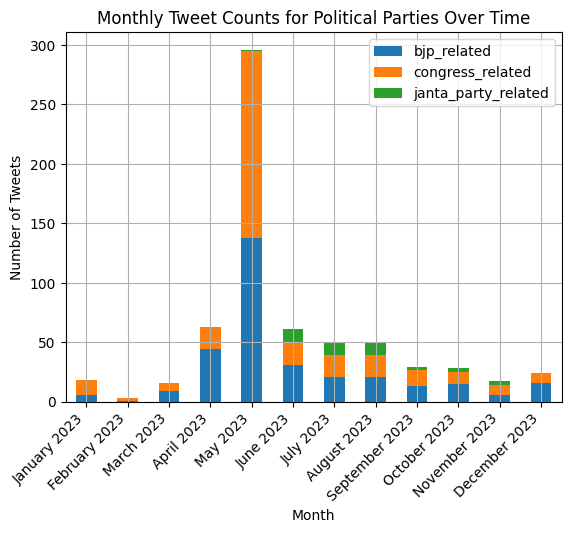

In [ ]:
import matplotlib.pyplot as plt
import calendar


bjp_keywords = ['bjp']
congress_keywords = ['congress']
janta_keywords = ['janta dal', 'janta party']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))
df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))
df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

monthly_party_counts = df.resample('M').agg({
    'bjp_related': 'sum',
    'congress_related': 'sum',
    'janta_party_related': 'sum'
})

monthly_party_counts.index = monthly_party_counts.index.strftime('%B %Y')

plt.figure(figsize=(12, 8))
monthly_party_counts.plot(kind='bar', stacked=True)
plt.title('Monthly Tweet Counts for Political Parties Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [ ]:
bjp_keywords = ['bjp']
congress_keywords = ['congress']
janta_keywords = ['janta dal', 'janta party']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))
df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))
df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))


In [ ]:
religion_keywords = ['hindu', 'muslim', 'religion', 'mandir', 'christanity','jain']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))


In [ ]:
monthly_counts = df.resample('M').agg({
    'bjp_related': 'sum',
    'congress_related': 'sum',
    'janta_party_related': 'sum',
    'religion_related': 'sum'
})


In [ ]:
monthly_percentages = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100


In [ ]:
import matplotlib.pyplot as plt


bjp_keywords = ['bjp']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

bjp_df = df[df['bjp_related']]

bjp_religion_counts = bjp_df.groupby('religion_related').size()

fig, ax = plt.subplots(figsize=(8, 6))

bar_positions = [0, 1]
bar_width = 0.4

ax.bar(bar_positions[0], bjp_religion_counts[False], width=bar_width, label='Non-Religious')
ax.bar(bar_positions[1], bjp_religion_counts[True], width=bar_width, label='Religious')


ax.set_title('BJP-Related Tweets: Non-Religious and Religious')
ax.set_xlabel('Tweet Type')
ax.set_ylabel('Number of Tweets')
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Non-Religious', 'Religious'])
ax.legend()

plt.show()


NameError: ignored

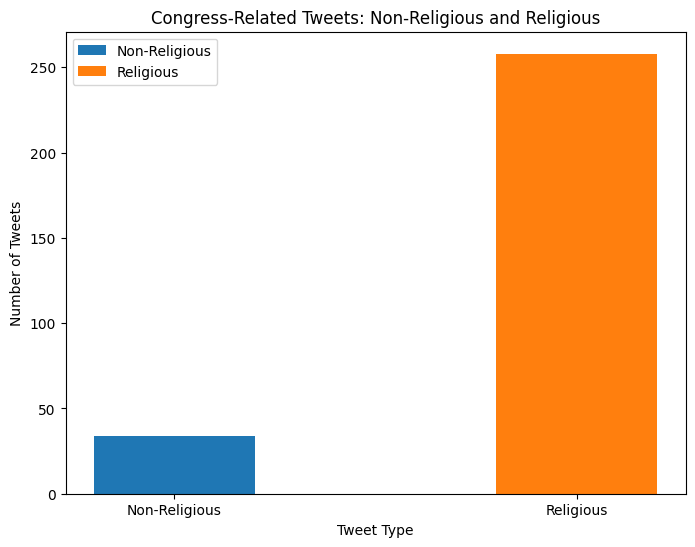

In [ ]:
import matplotlib.pyplot as plt


congress_keywords = ['congress']

df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

congress_df = df[df['congress_related']]

congress_religion_counts = congress_df.groupby('religion_related').size()

fig, ax = plt.subplots(figsize=(8, 6))

bar_positions = [0, 1]
bar_width = 0.4

ax.bar(bar_positions[0], congress_religion_counts[False], width=bar_width, label='Non-Religious')

ax.bar(bar_positions[1], congress_religion_counts[True], width=bar_width, label='Religious')

ax.set_title('Congress-Related Tweets: Non-Religious and Religious')
ax.set_xlabel('Tweet Type')
ax.set_ylabel('Number of Tweets')
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Non-Religious', 'Religious'])
ax.legend()

plt.show()


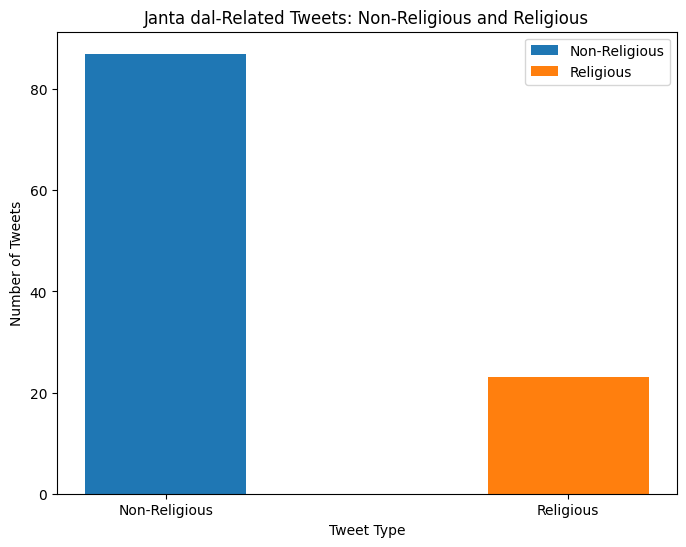

In [ ]:
import matplotlib.pyplot as plt


janta_keywords = ['janta', 'janta party', 'jdp','janta']

df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

aap_df = df[df['janta_party_related']]

aap_religion_counts = aap_df.groupby('religion_related').size()

fig, ax = plt.subplots(figsize=(8, 6))

bar_positions = [0, 1]
bar_width = 0.4

# Non-religious tweets
ax.bar(bar_positions[0], aap_religion_counts[False], width=bar_width, label='Non-Religious')
# Religious tweets
ax.bar(bar_positions[1], aap_religion_counts[True], width=bar_width, label='Religious')

ax.set_title('Janta dal-Related Tweets: Non-Religious and Religious')
ax.set_xlabel('Tweet Type')
ax.set_ylabel('Number of Tweets')
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Non-Religious', 'Religious'])
ax.legend()

plt.show()


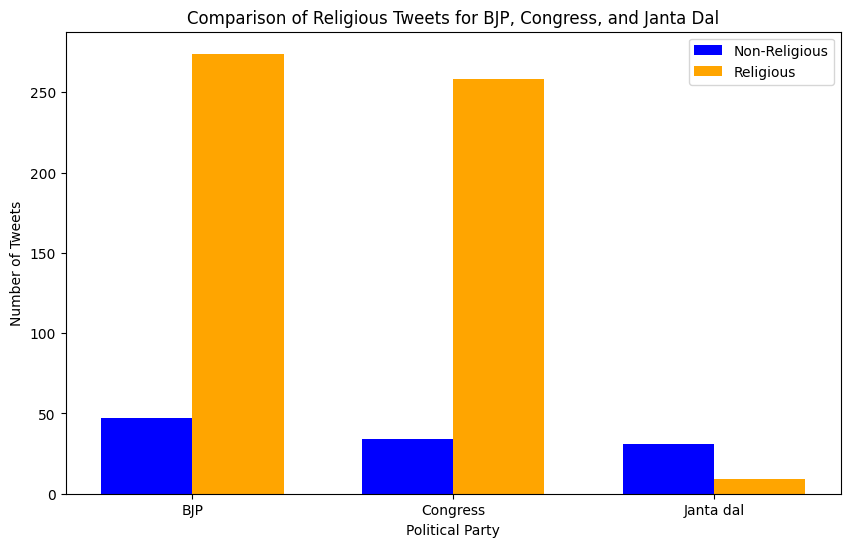

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



bjp_keywords = ['bjp']
congress_keywords = ['congress']
janta_keywords = ['janta dal', 'janta party']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))
df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))
df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

bjp_df = df[df['bjp_related']]
congress_df = df[df['congress_related']]
janta_df = df[df['janta_party_related']]

religion_counts = pd.DataFrame({
    'BJP': bjp_df['religion_related'].value_counts(),
    'Congress': congress_df['religion_related'].value_counts(),
    'Janta dal': janta_df['religion_related'].value_counts()
})

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions = np.arange(len(religion_counts.columns))

ax.bar(bar_positions - bar_width/2, religion_counts.loc[False], width=bar_width, label='Non-Religious', color='blue')

ax.bar(bar_positions + bar_width/2, religion_counts.loc[True], width=bar_width, label='Religious', color='orange')

ax.set_title('Comparison of Religious Tweets for BJP, Congress, and Janta Dal')
ax.set_xlabel('Political Party')
ax.set_ylabel('Number of Tweets')
ax.set_xticks(bar_positions)
ax.set_xticklabels(religion_counts.columns)
ax.legend()

plt.show()


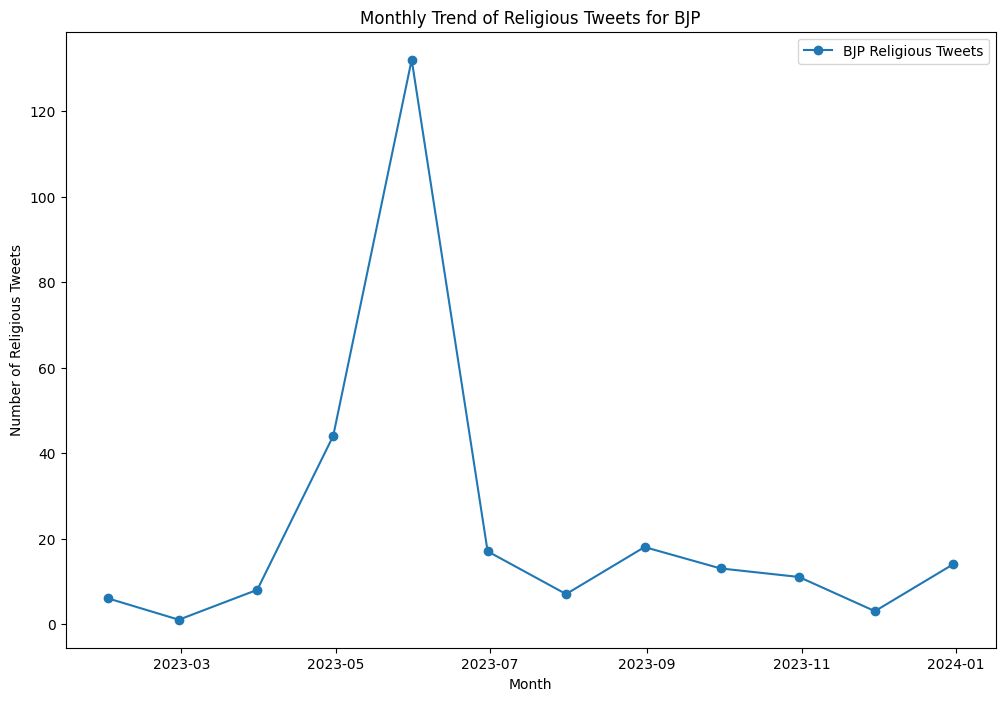

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


bjp_keywords = ['bjp']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

monthly_bjp_religion_counts = df[df['bjp_related']].resample('M')['religion_related'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_bjp_religion_counts.index, monthly_bjp_religion_counts, label='BJP Religious Tweets', marker='o')

ax.set_title('Monthly Trend of Religious Tweets for BJP')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Religious Tweets')
ax.legend()

plt.show()


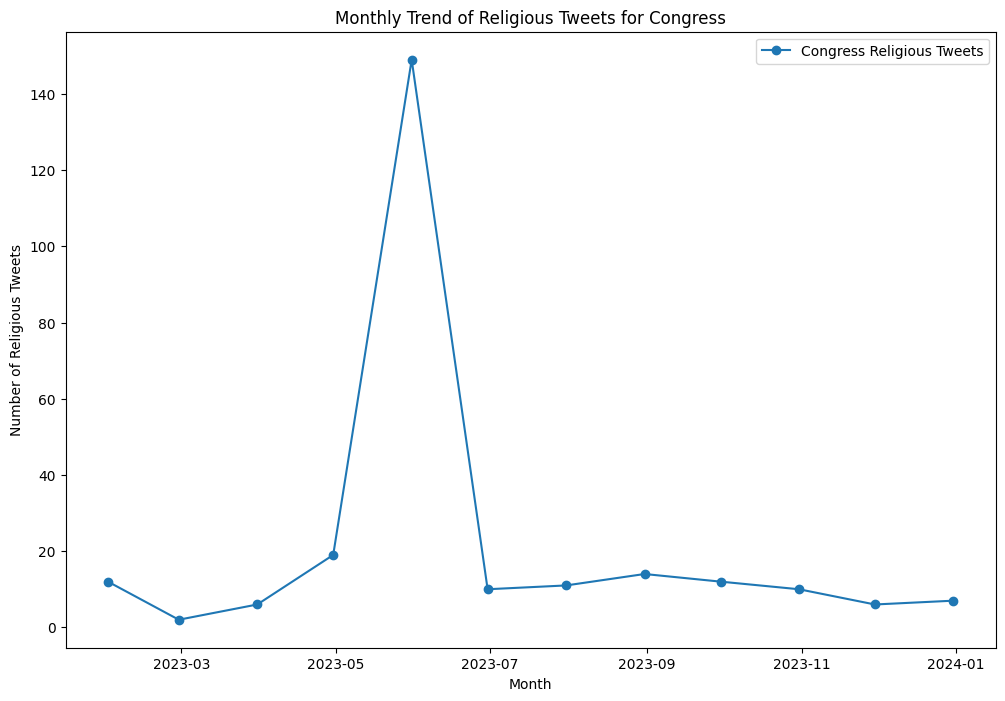

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


congress_keywords = ['congress']

df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

monthly_congress_religion_counts = df[df['congress_related']].resample('M')['religion_related'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_congress_religion_counts.index, monthly_congress_religion_counts, label='Congress Religious Tweets', marker='o')

ax.set_title('Monthly Trend of Religious Tweets for Congress')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Religious Tweets')
ax.legend()

plt.show()


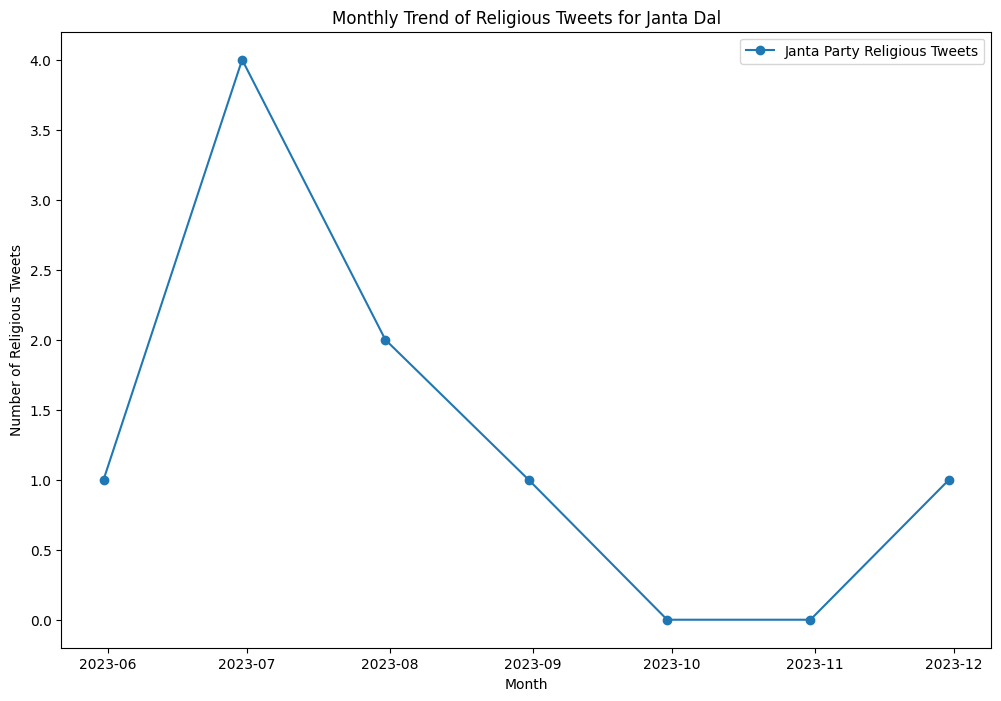

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


janta_keywords = ['janta dal', 'janta party']

df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords))

monthly_aap_religion_counts = df[df['janta_party_related']].resample('M')['religion_related'].sum()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_aap_religion_counts.index, monthly_aap_religion_counts, label='Janta Party Religious Tweets', marker='o')

ax.set_title('Monthly Trend of Religious Tweets for Janta Dal')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Religious Tweets')
ax.legend()

plt.show()


<ipython-input-31-5d207614c8c6>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religion_counts_bjp = bjp_df.resample('M').sum()['religion_related']
<ipython-input-31-5d207614c8c6>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religion_counts_congress = congress_df.resample('M').sum()['religion_related']
<ipython-input-31-5d207614c8c6>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religi

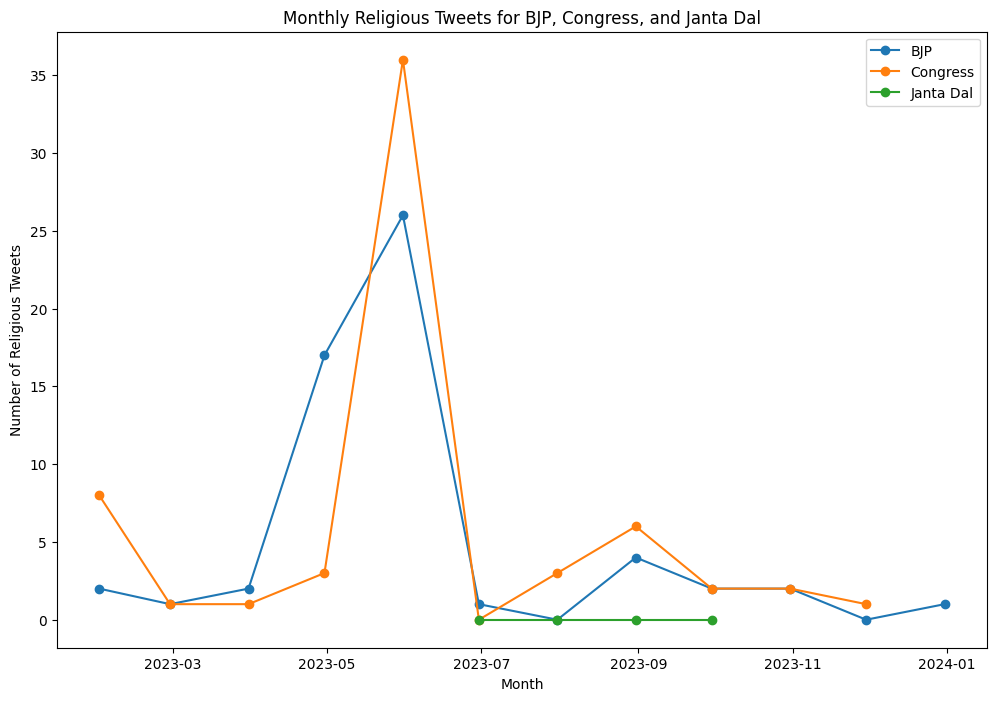

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


bjp_keywords = ['bjp']
congress_keywords = ['congress']
janta_keywords = ['janta dal', 'janta party']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))
df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))
df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords)).astype(int)

bjp_df = df[df['bjp_related'] == 1]
congress_df = df[df['congress_related'] == 1]
janta_df = df[df['janta_party_related'] == 1]

monthly_religion_counts_bjp = bjp_df.resample('M').sum()['religion_related']
monthly_religion_counts_congress = congress_df.resample('M').sum()['religion_related']
monthly_religion_counts_janta = janta_df.resample('M').sum()['religion_related']

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(monthly_religion_counts_bjp.index, monthly_religion_counts_bjp, label='BJP', marker='o')

ax.plot(monthly_religion_counts_congress.index, monthly_religion_counts_congress, label='Congress', marker='o')

ax.plot(monthly_religion_counts_janta.index, monthly_religion_counts_janta, label='Janta Dal', marker='o')

ax.set_title('Monthly Religious Tweets for BJP, Congress, and Janta Dal')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Religious Tweets')
ax.legend()

plt.show()


<ipython-input-38-02120616eeac>:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religion_counts_bjp = bjp_df.resample('M').sum()['religion_related']
<ipython-input-38-02120616eeac>:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religion_counts_congress = congress_df.resample('M').sum()['religion_related']
<ipython-input-38-02120616eeac>:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_religi

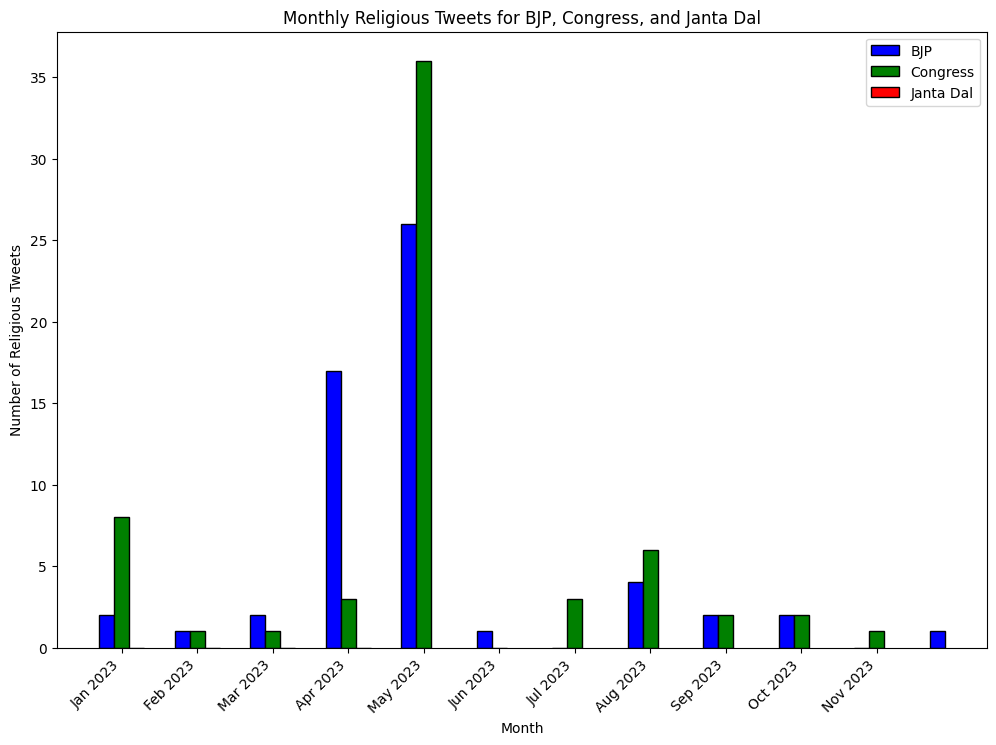

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame containing the tweet data

bjp_keywords = ['bjp']
congress_keywords = ['congress']
janta_keywords = ['janta dal', 'janta party']

df['bjp_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))
df['congress_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in congress_keywords))
df['janta_party_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in janta_keywords))

religion_keywords = ['hindu', 'muslim', 'religion', 'mandir']

df['religion_related'] = df['tweetText'].apply(lambda x: any(keyword in x.lower() for keyword in religion_keywords)).astype(int)

bjp_df = df[df['bjp_related'] == 1]
congress_df = df[df['congress_related'] == 1]
janta_df = df[df['janta_party_related'] == 1]

monthly_religion_counts_bjp = bjp_df.resample('M').sum()['religion_related']
monthly_religion_counts_congress = congress_df.resample('M').sum()['religion_related']
monthly_religion_counts_janta = janta_df.resample('M').sum()['religion_related']

fig, ax = plt.subplots(figsize=(12, 8))

# Bar width for better visibility
bar_width = 0.2

# Set the positions for the bars
bar_positions_bjp = np.arange(len(monthly_religion_counts_bjp))
bar_positions_congress = np.arange(len(monthly_religion_counts_congress))
bar_positions_janta = np.arange(len(monthly_religion_counts_janta))

# Plotting the bars with different colors
ax.bar(bar_positions_bjp, monthly_religion_counts_bjp, width=bar_width, label='BJP', color='b', edgecolor='black')
ax.bar(bar_positions_congress + bar_width, monthly_religion_counts_congress, width=bar_width, label='Congress', color='g', edgecolor='black')
ax.bar(bar_positions_janta + 2 * bar_width, monthly_religion_counts_janta, width=bar_width, label='Janta Dal', color='r', edgecolor='black')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions_congress + bar_width)
ax.set_xticklabels(monthly_religion_counts_congress.index.strftime('%b %Y'), rotation=45, ha='right')

ax.set_title('Monthly Religious Tweets for BJP, Congress, and Janta Dal')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Religious Tweets')
ax.legend()

plt.show()
